In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Extract recurrent mobility matrix

Assumptions
- ignore people working abroad
- ignore unknowns

In [2]:
import os
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/interim/census_2011/Pop_LPW_NL_25FEB15_delete_unknown.xlsx')
df = pd.read_excel(rel_dir, sheet_name="Tabel1_2011")

In [3]:
codes=df['00.24 - Werkende bevolking volgens geslacht, verblijfplaats en plaats van tewerkstelling'].loc[5:1942].dropna().values
mobility_df=pd.DataFrame(np.zeros([len(codes),len(codes)]),index=codes,columns=codes)

rows=[]
for i in df['00.24 - Werkende bevolking volgens geslacht, verblijfplaats en plaats van tewerkstelling'].loc[5:1942].dropna().index:
    rows.append(df.iloc[i+2,4:-1].values)

matrix = np.zeros([len(rows),len(rows)])
for j in range(len(rows)):
    matrix[j,:]=rows[j]

In [4]:
mobility_df=pd.DataFrame(matrix,index=codes,columns=codes)
mobility_df.head()

,01000,02000,03000,04000,10000,11000,11001,11002,11004,11005,...,92141,92142,93000,93010,93014,93018,93022,93056,93088,93090
01000,4340675.0,2500219.0,1145273.0,695183.0,752499.0,440273.0,9540.0,265777.0,3684.0,6294.0,...,1169.0,8407.0,15126.0,482.0,3684.0,351.0,3878.0,3057.0,2786.0,888.0
02000,2692891.0,2391573.0,46578.0,254740.0,732539.0,427316.0,8706.0,256951.0,3643.0,6043.0,...,11.0,527.0,221.0,2.0,53.0,2.0,57.0,75.0,29.0,3.0
03000,1279677.0,64835.0,1075792.0,139050.0,12335.0,8008.0,591.0,5305.0,31.0,150.0,...,1150.0,7653.0,14824.0,478.0,3612.0,349.0,3784.0,2970.0,2747.0,884.0
04000,368107.0,43811.0,22903.0,301393.0,7625.0,4949.0,243.0,3521.0,10.0,101.0,...,8.0,227.0,81.0,2.0,19.0,0.0,37.0,12.0,10.0,1.0
10000,733602.0,689937.0,7151.0,36514.0,614859.0,359572.0,6171.0,210903.0,3407.0,5012.0,...,0.0,98.0,56.0,2.0,8.0,0.0,16.0,22.0,7.0,1.0


In [5]:
idx_arrondisement=[]
for idx in mobility_df.index:
    if ((str(idx)[-3:] == '000') & (len(str(idx)) != 4) & (str(idx)[-4:] != '0000') & (str(idx)[0] != '0')):
        idx_arrondisement.append(idx)
print(idx_arrondisement)

['11000', '12000', '13000', '21000', '23000', '24000', '25000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '41000', '42000', '43000', '44000', '45000', '46000', '51000', '52000', '53000', '54000', '55000', '56000', '57000', '61000', '62000', '63000', '64000', '71000', '72000', '73000', '81000', '82000', '83000', '84000', '85000', '91000', '92000', '93000']


In [6]:
mobility_df.loc[idx_arrondisement,idx_arrondisement]

,11000,12000,13000,21000,23000,24000,25000,31000,32000,33000,...,72000,73000,81000,82000,83000,84000,85000,91000,92000,93000
11000,309701.0,17352.0,10928.0,19733.0,10141.0,3290.0,881.0,1274.0,31.0,160.0,...,612.0,375.0,80.0,26.0,26.0,42.0,14.0,51.0,549.0,28.0
12000,26260.0,75173.0,4745.0,11407.0,9906.0,5191.0,398.0,378.0,17.0,63.0,...,228.0,216.0,33.0,14.0,9.0,21.0,5.0,13.0,201.0,8.0
13000,23611.0,7808.0,132162.0,5021.0,2396.0,5192.0,256.0,387.0,17.0,93.0,...,2271.0,351.0,45.0,19.0,16.0,37.0,4.0,27.0,204.0,20.0
21000,4949.0,2013.0,663.0,287021.0,25856.0,3047.0,12590.0,601.0,13.0,77.0,...,118.0,198.0,140.0,43.0,130.0,119.0,36.0,219.0,1889.0,81.0
23000,7637.0,6913.0,925.0,95532.0,112383.0,6187.0,5657.0,584.0,31.0,108.0,...,182.0,270.0,65.0,31.0,39.0,49.0,12.0,70.0,764.0,43.0
24000,7330.0,9078.0,4279.0,31528.0,20445.0,120806.0,2405.0,475.0,19.0,92.0,...,754.0,923.0,54.0,19.0,25.0,38.0,9.0,33.0,405.0,17.0
25000,1319.0,476.0,225.0,46501.0,7358.0,1590.0,78950.0,196.0,3.0,27.0,...,45.0,62.0,76.0,32.0,118.0,105.0,19.0,276.0,4024.0,121.0
31000,2511.0,510.0,396.0,5339.0,1164.0,596.0,243.0,86050.0,654.0,330.0,...,116.0,96.0,22.0,10.0,7.0,17.0,3.0,21.0,160.0,15.0
32000,213.0,77.0,54.0,379.0,123.0,96.0,43.0,2176.0,10520.0,1202.0,...,14.0,14.0,7.0,3.0,1.0,0.0,0.0,7.0,19.0,1.0
33000,445.0,125.0,99.0,833.0,345.0,163.0,42.0,783.0,1033.0,29326.0,...,44.0,20.0,3.0,4.0,3.0,6.0,2.0,8.0,25.0,2.0


In [7]:
mobility_df.loc[idx_arrondisement,idx_arrondisement].to_csv('../../data/interim/census_2011/recurrent_mobility.csv')

In [8]:
NIS = mobility_df.loc[idx_arrondisement,idx_arrondisement]

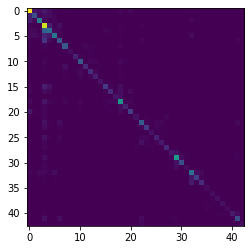

In [9]:
plt.imshow(mobility_df.loc[idx_arrondisement,idx_arrondisement])

## Extract population size (initN)

In [10]:
import os
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/raw/census_2011/census_demo_nl_04nov14.xlsx')
df = pd.read_excel(rel_dir, sheet_name="Tabel3_2011")

In [11]:
codes=df['00.04 - Bevolking van Belgische en vreemde nationaliteit naar geslacht en leeftijdsklasse'].loc[5:1943].dropna().values
columns = ['total','[0,10[','[10,20[','[20,30[','[30,40[','[40,50[','[50,60[','[60,70[','[70,80[','[80,inf[']
initN_df=pd.DataFrame(np.zeros([len(codes),len(columns)]),index=codes,columns=columns)
initN_df.head()

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
rows=np.zeros([len(codes),len(columns)])
k=0
for i in df['00.04 - Bevolking van Belgische en vreemde nationaliteit naar geslacht en leeftijdsklasse'].loc[5:1943].dropna().index:
    rows[k,0] = int(df.iloc[i+2,-1]) # total
    vals_raw = df.iloc[i+2,45:-1].values
    for j in range(len(vals_raw)-11):
        rows[k,j+1] = int(vals_raw[2*j]+vals_raw[2*j+1])
        if j == 8:
            rows[k,j+1] = int(sum(vals_raw[16:]))
    k = k + 1
    
initN_df=pd.DataFrame(rows,index=codes,columns=columns)
initN_df.tail()

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
93018,2896.0,315.0,402.0,299.0,341.0,412.0,358.0,348.0,251.0,170.0
93022,11512.0,1330.0,1467.0,1469.0,1501.0,1589.0,1652.0,1160.0,863.0,481.0
93056,9053.0,1009.0,1057.0,1105.0,1079.0,1399.0,1240.0,1008.0,740.0,416.0
93088,18114.0,2030.0,2247.0,2099.0,2300.0,2762.0,2662.0,2067.0,1167.0,780.0
93090,5914.0,622.0,706.0,723.0,694.0,823.0,810.0,718.0,500.0,318.0


In [13]:
idx_arrondisement=[]
for idx in initN_df.index:
    if ((str(idx)[-3:] == '000') & (len(str(idx)) != 4) & (str(idx)[-4:] != '0000') & (str(idx)[0] != '0')):
        idx_arrondisement.append(idx)
print(idx_arrondisement)

[11000, 12000, 13000, 21000, 23000, 24000, 25000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 41000, 42000, 43000, 44000, 45000, 46000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 61000, 62000, 63000, 64000, 71000, 72000, 73000, 81000, 82000, 83000, 84000, 85000, 91000, 92000, 93000]


In [14]:
initN_df.loc[idx_arrondisement,:]

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
11000,1005002.0,116466.0,112965.0,129727.0,131297.0,144626.0,133046.0,102617.0,80576.0,53682.0
12000,327928.0,36304.0,36491.0,38710.0,41832.0,50049.0,45157.0,34414.0,27412.0,17559.0
13000,440337.0,45627.0,48864.0,52869.0,56162.0,70786.0,64688.0,47770.0,35043.0,18528.0
21000,1136778.0,155502.0,122871.0,177461.0,195891.0,157533.0,124139.0,88540.0,64245.0,50596.0
23000,600350.0,69414.0,73678.0,66625.0,73834.0,92424.0,83928.0,61916.0,48368.0,30163.0
24000,488342.0,52438.0,52622.0,59960.0,64799.0,74156.0,68086.0,51526.0,39017.0,25738.0
25000,383648.0,45061.0,49901.0,45827.0,47468.0,56688.0,52802.0,41021.0,26901.0,17979.0
31000,277889.0,25454.0,29757.0,30940.0,31979.0,40701.0,40218.0,34736.0,27300.0,16804.0
32000,50029.0,5366.0,5860.0,6255.0,6170.0,7456.0,6508.0,5097.0,4295.0,3022.0
33000,106449.0,11594.0,12773.0,12922.0,12723.0,15305.0,14196.0,11395.0,9085.0,6456.0


In [15]:
initN_df.loc[idx_arrondisement,:].to_csv('../../data/interim/census_2011/initN.csv')

## Model

In [16]:
import random
import os
import numpy as np
import json
import corner
import random

import pandas as pd
import datetime
import scipy
import matplotlib.dates as mdates
import matplotlib
import math
import xarray as xr
import emcee
import matplotlib.pyplot as plt

from covid19model.optimization import objective_fcns
from covid19model.optimization import MCMC
from covid19model.models import models
from covid19model.data import google
from covid19model.data import sciensano
from covid19model.data import polymod
from covid19model.data import parameters
from covid19model.visualization.output import population_status, infected
from covid19model.visualization.optimization import plot_fit, traceplot

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [17]:
initN, Nc_home, Nc_work, Nc_schools, Nc_transport, Nc_leisure, Nc_others, Nc_total = polymod.get_interaction_matrices()

In [18]:
initN = initN_df.loc[idx_arrondisement,:].values
initN = initN[:,1:]
print(initN.shape)

(43, 9)


In [19]:
# Load the parameters using `get_COVID19_SEIRD_parameters()`.
params = parameters.get_COVID19_SEIRD_parameters()
# Add the delayed ramp parameters to the parameter dictionary.
params.update({'l': 1,
              'tau': 5,
              'd': 100,
              'NIS': NIS}) # overdispersion coefficient (adds variability --> larger value means less influential)
# Delete the following parameters, they are not included in the stochastic implementation
del params['totalTests']
del params['dq']
del params['psi_FP']
del params['psi_PP']
# Define the initial condition: one exposed inidividual in every age category
initial_states = {'S': initN, 'E': np.ones(initN.shape)}
# Load the compliance model
from covid19model.models.compliance import ramp_2
# Initialize the model
model = models.COVID19_SEIRD_sto_spatial(initial_states, params, compliance=ramp_2, discrete=True)

In [20]:
out=model.sim(100)

In [21]:
out

<xarray.Dataset>
Dimensions:   (NIS: 43, Nc: 9, time: 101)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 7 8 9 ... 92 93 94 95 96 97 98 99 100
  * NIS       (NIS) int64 0 1 2 3 4 5 6 7 8 9 ... 33 34 35 36 37 38 39 40 41 42
  * Nc        (Nc) int64 0 1 2 3 4 5 6 7 8
Data variables:
    S         (NIS, Nc, time) float64 1.165e+05 1.165e+05 1.165e+05 ... 0.0 0.0
    E         (NIS, Nc, time) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    I         (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    A         (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    M         (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ER        (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    C         (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    C_icurec  (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ICU       (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    R         (NIS, Nc, time) float64 0.0 0.0 0.0 ... 2.899e+03 2.899e+03
    D         (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 ... 245.0 245.0 245.0
    H_in      (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    H_out     (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    H_tot     (NIS, Nc, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    parameters:  {'beta': 0.03492, 'd': 100, 'sigma': 3.2, 'omega': 2.0, 'zet...

In [22]:
sumNIS=out.sum(dim="NIS").sum(dim="Nc")

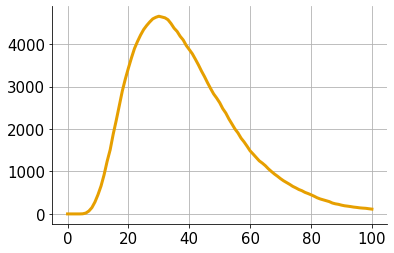

In [23]:
plt.plot(out["time"],sumNIS["ICU"])

### Visualisation

In [24]:
import geopandas as gp

In [25]:
# Read shape file
gemeentes = gp.read_file("../../data/raw/geological/BELGIUM__Municipalities.shp")
gemeentes.head()

,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,CODE_INS,arrond,geometry
0,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11001,11,"POLYGON ((4.40125 51.14814, 4.40114 51.14797, ..."
1,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11002,11,"POLYGON ((4.34109 51.35766, 4.34112 51.35760, ..."
2,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11004,11,"POLYGON ((4.52882 51.19051, 4.52971 51.19020, ..."
3,4,BOOM,BOOM,BOOM,Boom,11005,11,"POLYGON ((4.36411 51.10597, 4.36456 51.10596, ..."
4,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11007,11,"POLYGON ((4.48350 51.20315, 4.48354 51.20314, ..."


In [26]:
# select the columns that you with to use for the dissolve and that will be retained
gemeentes_new = gemeentes[['arrond','geometry']]

# dissolve the state boundary by region 
arrondissementen = gemeentes_new.dissolve(by='arrond')

# view the resulting geodataframe
arrondissementen

,geometry
arrond,
11,"POLYGON ((4.38527 51.08066, 4.38289 51.08149, ..."
12,"POLYGON ((4.71427 51.12583, 4.71476 51.12602, ..."
13,"MULTIPOLYGON (((5.21721 51.21141, 5.21734 51.2..."
21,"POLYGON ((4.46177 50.84879, 4.46237 50.84894, ..."
23,"POLYGON ((3.89856 50.73236, 3.89867 50.73233, ..."
24,"POLYGON ((5.10658 50.77905, 5.10659 50.77905, ..."
25,"POLYGON ((4.65695 50.60171, 4.65689 50.60154, ..."
31,"POLYGON ((3.36025 51.19190, 3.36031 51.19183, ..."
32,"POLYGON ((3.01452 51.06997, 3.01467 51.07006, ..."


In [37]:
import os
output_path = 'charts/maps'

# create the plot
fig, ax = plt.subplots(figsize = (12,12))

for day in range(len(out['time'].values)):
    # Get data
    data2plot = out.sum(dim="Nc")['H_in'][:,day].values
    print(data2plot)
    arrondissementen['data'] = data2plot
    # Visualize data
    if day == 0:
        fig = arrondissementen.plot(column = 'data', ax=ax, vmin=0, vmax=400, legend=True)
    else:
        fig = arrondissementen.plot(column = 'data', ax=ax, vmin=0, vmax=400, legend=False)
    # Disable axis
    ax.set_axis_off()
    # This will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    chart = fig.get_figure()
    chart.savefig('maps/'+str(day)+'_B.jpg',dpi=50)
    
    plt.close()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6. 1. 4. 3. 4. 2. 2. 0. 0. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1. 0. 2. 0. 2. 0.
 0. 0. 0. 0. 0. 4. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 0. 1.]
[19.  7.  8. 20. 10.  8.  4.  5.  2.  1.  2.  5.  5.  1.  1.  5.  4.  2.
  4.  0.  2.  2.  9.  3.  1.  1.  2.  5.  5.  8.  1.  0. 10.  1.  1.  1.
  1.  1.  1.  0.  1.  8.  1.]
[31. 16. 13. 37. 16. 13. 11.  9.

[115.  39.  31. 121.  80.  39.  30.  45.   8.  16.  23.  19.  21.   3.
  18.  24.  16.   8.  41.  17.  22.   6.  43.  30.   8.  24.  15.  17.
  12.  63.  31.  11.  28.  16.  13.   4.   6.   8.  10.   7.  10.  26.
   6.]
[100.  30.  38. 101.  51.  43.  27.  30.   2.  13.  35.  10.  20.  13.
   6.  28.  22.  11.  48.  14.  16.  12.  36.  33.   6.  16.  16.  15.
   8.  56.  22.   5.  30.  12.  23.   8.   4.   2.  11.   2.  10.  22.
   4.]
[103.  35.  44.  96.  60.  46.  36.  27.   3.   7.  26.  15.  18.  10.
   9.  33.  19.   6.  61.  15.  18.   9.  42.  21.   6.  18.   9.  16.
   4.  56.  24.   5.  31.   6.   9.   3.   3.   4.   3.   0.   7.  25.
   3.]
[78. 26. 27. 71. 52. 37. 33. 23.  4. 15. 22. 19. 19. 12.  8. 17. 10. 10.
 38. 11. 17.  5. 28. 22.  5.  8. 11. 11. 11. 60. 25. 17. 33. 11. 18.  6.
  3.  6.  4.  4.  8. 18.  6.]
[63. 20. 40. 58. 48. 38. 26. 20.  4. 12. 17. 23.  9.  2.  3. 17. 15. 10.
 41. 18. 22. 10. 23. 23.  7. 18. 24. 13.  9. 47. 11.  1. 25.  9.  7.  0.
  4.  2.  5.  4.  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.